In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
#(1.1)
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

[-0.07189399]
[ 0.92333933 -2.21162959]
[  0.24255326   9.19565971 -32.08347051  23.16688882]
[  1.70356324e-01  -2.36369360e+02   5.90005297e+03  -5.48152151e+04
   2.62911023e+05  -7.31110762e+05   1.22577543e+06  -1.22303725e+06
   6.69279805e+05  -1.54727647e+05]


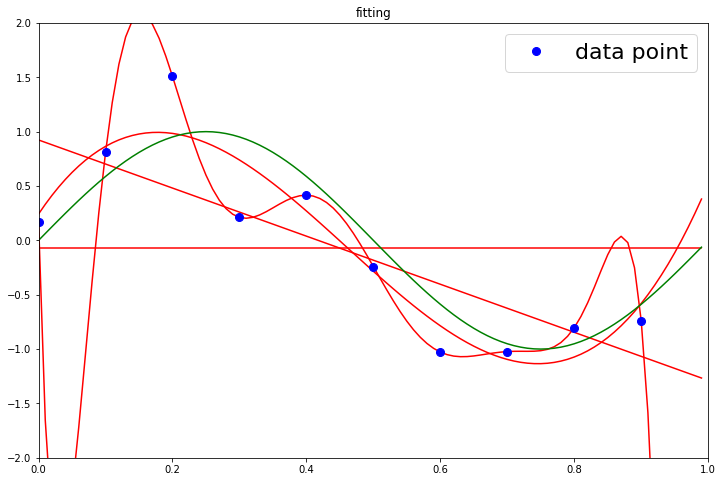

In [29]:
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=10
x_train = np.arange(0, 1, 0.1)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

for M in [0,1,3,9]:
    W = E(x_train, y_train, M)
    print(W)

    y_estimate = [y(x, W, M) for x in x_real]

    matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
    plt.plot(x_real, y_estimate, 'r-')
    plt.xlim([0.0, 1.0])
    plt.ylim([-2, 2])
    plt.title("fitting")
plt.plot(x_train, y_train, 'bo', ms=8, label='data point') 
plt.plot(x_real, y_real, 'g-')
plt.legend(loc='upper right', fontsize=22)